In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Load Data

In [45]:
data = pd.read_csv('houseprice.csv', index_col=0)

### Data Info & Preprocessing

In [46]:
print(data.shape)
data.info()

# Change datatype for certain features
for attr in ['MSSubClass', 'OverallQual', 'OverallCond']:
    data[attr] = data[attr].astype('object')

# Add new attributes: Building_age and Remodel_age
current_year = int(dt.datetime.now().year)
data['Building_age'] = current_year - data['YearBuilt']
data['Remodel_age'] = current_year - data['YearRemodAdd']

(1460, 80)
<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  Ye

##### Fill missing values

In [47]:
data.fillna({
    'Alley': 'No alley access',
    'MasVnrType': 'None',
    'BsmtQual': 'No Basement',
    'BsmtCond': 'No Basement',
    'Electrical': 'SBrkr',
    'FireplaceQu': 'No Fireplace',
    'GarageType': 'No Garage',
    'PoolQC': 'No Pool',
    'Fence': 'No Fence',
    'MiscFeature': 'None',
    'LotFrontage': data['LotFrontage'].median(),
    'MasVnrArea': 0,
    'GarageYrBlt': 0
}, inplace=True)

### Standardization

In [48]:
numeric_data = data.select_dtypes(include=[np.number])
numeric_data_filtered = numeric_data.drop('SalePrice', axis=1)

In [49]:
scaler = StandardScaler()
scaled_numeric_data = scaler.fit_transform(numeric_data_filtered)

### PCA from scratch

In [50]:
cov_matrix = np.cov(scaled_numeric_data.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Determine number of Principal Components
sorted_eigenvalues = sorted(eigenvalues, reverse=True)

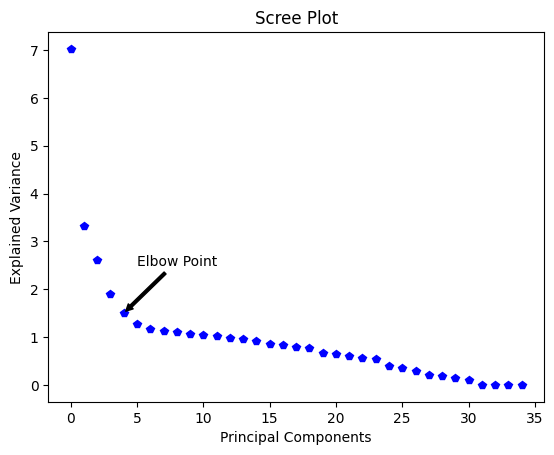

In [51]:
plt.plot(sorted_eigenvalues, 'bp')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.annotate(text='Elbow Point', xy=(4, 1.5), xytext=(5, 2.5), arrowprops=dict(facecolor='black', arrowstyle='simple'))
plt.show()

### Compute Principal Components manually

In [52]:
selected_eigenvectors = eigenvectors[:, 0:5]
manual_PCA_result = pd.DataFrame(scaled_numeric_data.dot(selected_eigenvectors), columns=['Manual_PC1', 'Manual_PC2', 'Manual_PC3', 'Manual_PC4', 'Manual_PC5'])

### PCA using sklearn

In [53]:
pca_model = PCA(n_components=5, random_state=0)
sklearn_PCA_result = pca_model.fit_transform(scaled_numeric_data)
sklearn_PCA_df = pd.DataFrame(sklearn_PCA_result, columns=['Sklearn_PC1', 'Sklearn_PC2', 'Sklearn_PC3', 'Sklearn_PC4', 'Sklearn_PC5'])

### Comparing manual vs sklearn PCA results

In [54]:
print(manual_PCA_result.head())
print(sklearn_PCA_df.head())

   Manual_PC1  Manual_PC2  Manual_PC3  Manual_PC4  Manual_PC5
0   -1.571468    0.233699    1.586585    2.219473   -0.715615
1   -0.199890    0.835867   -1.050234   -0.097077    0.627275
2   -1.740971    0.251788    1.391157    1.637273   -0.046151
3    1.470652   -1.877190   -1.515307    0.180157    1.837106
4   -4.216754   -1.116376    0.533713    1.621483    0.334647
   Sklearn_PC1  Sklearn_PC2  Sklearn_PC3  Sklearn_PC4  Sklearn_PC5
0     1.571352    -0.240622    -1.586777    -2.241474     0.753565
1     0.199709    -0.835527     1.042285     0.089567    -0.634687
2     1.741028    -0.250540    -1.389540    -1.627933     0.038217
3    -1.470503     1.871470     1.526313    -0.195221    -1.759654
4     4.216874     1.125024    -0.532845    -1.588267    -0.391245


The manual and sklearn-based PCA methods yield similar results in terms of principal component magnitudes, although the signs may be opposite. The reason the signs are flipped is due to the mathematical properties of eigenvectors. This illustrates the effectiveness of both the manual calculation and sklearn's PCA method in reducing the dimensionality of the dataset.